<a href="https://colab.research.google.com/github/rladbstj56/2024PythonDataAnalysis/blob/main/241112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

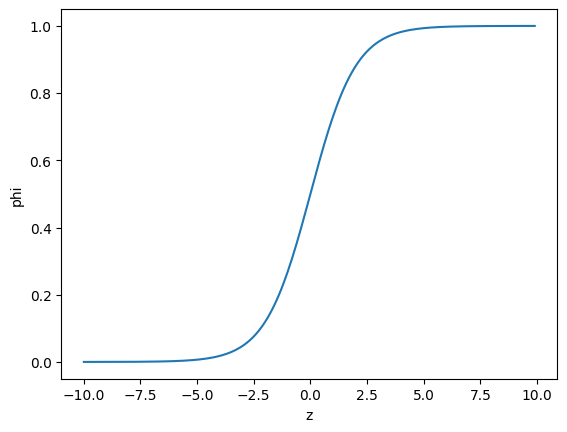

In [1]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-10,10,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
dia = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print(dia.info())
dia_x = dia.drop('Outcome',axis = 1)
print(dia_x.head())
dia_y = dia[['Outcome']]
print(dia_y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6      148             72             35        0  33.6                     0.627   50
1            1       85            

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dia_x, dia_y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [10]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
print(x_train_std)
print(x_test_std)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]
[[ 0.49124165 -0.72667791 -0.44147615 ...  0.23374785 -0.17094071
   0.66661154]
 [-0.63368347 -0.28534901  0.31890843 ...  0.43537945 -1.08608042
  -1.07335756]
 [-0.63368347 -0.41144298 -0.17310512 ... -0.14579397 -1.05362866
  -1.07335756]
 ...
 [ 1.05370422 -0.82124838  0.18472291 ...  0.56584695  0.00754398
   1.77386461]
 [-0.63368347  0.78644972  0.09526591 ... -0.47789306 -0.47274211
  -0.44064153]
 [ 1.05370422 -1.48324172  0.09526591 ...  0.38793672  0.72148276
   0.35025352]]


In [12]:
model = LogisticRegression()
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)
model_score = model.score(x_test_std, y_test)
print(model_score)
print(confusion_matrix(y_test,y_pred))
print(model.coef_)

0.7857142857142857
[[86 13]
 [20 35]]
[[ 0.21255394  1.07130143 -0.24782647  0.0457288  -0.20078252  0.77818216
   0.23062467  0.42120732]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
corr = dia.corr()
corr['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [28]:
x_corr = dia[['Glucose','BMI','Age','Pregnancies']]
x_corr.head()

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_corr, dia_y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 4)
(154, 4)
(614, 1)
(154, 1)


In [30]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
print(x_train_std)
print(x_test_std)

[[-1.15139792 -4.13525578 -1.03594038 -0.52639686]
 [-0.27664283 -0.48916881  1.48710085  1.58804586]
 [ 0.56687102 -0.42452187 -0.94893896 -0.82846011]
 ...
 [-0.62029661  1.76054443  0.44308379  1.8901091 ]
 [ 0.62935353  1.34680407 -0.33992901 -1.13052335]
 [ 0.12949347 -1.22614383 -1.03594038 -1.13052335]]
[[-7.26677906e-01  2.33747854e-01  6.66611540e-01  4.91241653e-01]
 [-2.85349014e-01  4.35379445e-01 -1.07335756e+00 -6.33683471e-01]
 [-4.11442983e-01 -1.45793966e-01 -1.07335756e+00 -6.33683471e-01]
 [-4.42966476e-01 -8.81156242e-01 -4.51940027e-02  1.05370422e+00]
 [ 4.71214800e-01 -2.52540103e-01  1.22023807e+00  7.72472934e-01]
 [-5.69060445e-01  6.72593083e-01  1.61568560e+00  4.91241653e-01]
 [-1.57781220e+00 -1.37930488e+00 -9.94268060e-01 -9.14914752e-01]
 [-1.27731553e-01  2.10026490e-01  7.45701045e-01 -1.19614603e+00]
 [ 1.03863766e+00 -8.64905567e-02  1.92074512e-01 -7.12209088e-02]
 [ 8.17973215e-01  1.98165808e-01  2.40658064e+00  2.10010372e-01]
 [-3.16872507e-01 

In [31]:
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)
model_score = model.score(x_test_std, y_test)
print(model_score)
print(confusion_matrix(y_test,y_pred))
print(model.coef_)

0.7532467532467533
[[84 15]
 [23 32]]
[[0.98242023 0.72232489 0.38907927 0.20280756]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1_score)

0.7532467532467533
0.6808510638297872
0.5818181818181818
0.6274509803921569


In [21]:
x_coef = dia_x.drop(['BloodPressure','Insulin'],axis=1)
x_coef.head()

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6,148,35,33.6,0.627,50
1,1,85,29,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,23,28.1,0.167,21
4,0,137,35,43.1,2.288,33


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_coef, dia_y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 6)
(154, 6)
(614, 1)
(154, 1)


In [24]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
print(x_train_std)
print(x_test_std)

[[-0.52639686 -1.15139792 -1.32277365 -4.13525578 -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.23350519 -0.48916881  2.41502991  1.48710085]
 [-0.82846011  0.56687102 -0.09071957 -0.42452187  0.54916055 -0.94893896]
 ...
 [ 1.8901091  -0.62029661  1.07648956  1.76054443  1.981245    0.44308379]
 [-1.13052335  0.62935353 -1.32277365  1.34680407 -0.78487662 -0.33992901]
 [-1.13052335  0.12949347 -1.32277365 -1.22614383 -0.61552223 -1.03594038]]
[[ 4.91241653e-01 -7.26677906e-01  6.67308333e-01  2.33747854e-01
  -1.70940714e-01  6.66611540e-01]
 [-6.33683471e-01 -2.85349014e-01  6.11305345e-01  4.35379445e-01
  -1.08608042e+00 -1.07335756e+00]
 [-6.33683471e-01 -4.11442983e-01 -1.18079028e+00 -1.45793966e-01
  -1.05362866e+00 -1.07335756e+00]
 [ 1.05370422e+00 -4.42966476e-01 -1.18079028e+00 -8.81156242e-01
   1.21150438e+00 -4.51940027e-02]
 [ 7.72472934e-01  4.71214800e-01 -1.18079028e+00 -2.52540103e-01
  -8.84879495e-01  1.22023807e+00]
 [ 4.91241653e-01 -5.69060445e-01  6.11

In [25]:
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)
model_score = model.score(x_test_std, y_test)
print(model_score)
print(confusion_matrix(y_test,y_pred))
print(model.coef_)

0.7922077922077922
[[89 10]
 [22 33]]
[[ 0.20948049  0.96849022 -0.07864661  0.73185107  0.22338708  0.37893431]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
